In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [22]:
# Study data files
A_path = "group3_resources/SpotifyFeatures.csv"


# Read the mouse data and the study results
spotify_df = pd.read_csv(A_path)

#Visualizing data
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [16]:
len(spotify_df)

232725

In [25]:
count_track_name=spotify_df["track_name"].value_counts()
count_track_name

Home                                                           100
You                                                             71
Intro                                                           69
Stay                                                            63
Wake Up                                                         59
                                                              ... 
Bach: Cello Suite No. 1 in G Major, BWV 1007: II. Allemande      1
45 (A Matter Of Time)                                            1
Dakota - Undercover Extended Mix                                 1
78 R.P.M.                                                        1
Leghorn Women                                                    1
Name: track_name, Length: 148615, dtype: int64

In [32]:
#counting tracks
count_tracks=spotify_df["track_id"].value_counts()
count_tracks.head(50)



6sVQNUvcVFTXvlk3ec0ngd    8
6AIte2Iej1QKlaofpjCzW1    8
3uSSjnDMmoyERaAK9KvpJR    8
0wY9rA9fJkuESyYm9uzVK5    8
3R73Y7X53MIQZWnKloWq5i    8
0UE0RhnRaEYsiYgXpyLoZc    8
711WfDztCZpnmJg7Uvwod3    7
6MCYY4i1zrRIbVj9YlVUdF    7
3KN0D3jPB4Hqi1xyuOoeKL    7
7eqoqGkKwgOaWNNHx90uEZ    7
7DfFc7a6Rwfi3YQMRbDMau    7
68dd9CEzAUc4zeukKzMJP5    7
0iTpQYzJnYgh7kIxyq8A2O    7
3kb38wezoUA8ki5jPYy3t5    7
5cwN1htZyoWqZCc33f3RfE    7
03wKMRNYVvw6s9nm4I4jUS    7
297rZsBEjFw9d0Gl3iBLnd    7
7MPSPxCd6aiGZwN0ro0ZSH    7
7dQeS4ErW1iWvnKdrtKwKr    7
3lwcrfL6LfZ1p9ZU8KRx4n    7
6NqbN00vLmWfrQSx2wjD4z    7
3CgZCQyuyxHRMWB9BTwmni    7
3wImXdE4bliIVSEl3lVue1    7
5v6fwkgHeF0N32LmEoQyQB    7
6PmnGYDsruYLBNY4Rpx4t9    7
6Nle9hKrkL1wQpwNfEkxjh    7
5gW5dSy3vXJxgzma4rQuzH    7
5MjAFPcmrR1DYCgZrXCN4d    7
5lcyIeEfwZTs8Ajw3kdF7P    7
1FTSo4v6BOZH9QxKc3MbVM    7
6NueIkCzLhp4rXpNAiXDdh    7
0T1hQWoeHLABtNE0gpPCd0    7
40rjypnguxfhPy4Bbv5SWc    7
32cHleNk6n0RIVJMF4Q8LU    7
5OpiyfqaQLdtwHd3SfembH    7
7Kho44itYaCQZvZQVV2S

In [19]:
#counting artist
count_artist=spotify_df["artist_name"].value_counts()
count_artist

Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
                          ... 
Dexter Story                 1
George White Group           1
Tyler Hammond                1
Gus Viseur                   1
R.I.O.                       1
Name: artist_name, Length: 14564, dtype: int64

In [21]:
len(spotify_df["artist_name"].unique())

14564

In [27]:
spotify_df["artist_name"].unique()


array(['Henri Salvador', 'Martin & les fées', 'Joseph Williams', ...,
       'Dharmasoul', 'Swim', 'Jr Thomas & The Volcanos'], dtype=object)

In [35]:
#Grouping by track id and take the average for each track popularity
genres_group=pd.DataFrame(spotify_df.groupby(['track_id'])['popularity'].mean())
genres_group=genres_group.reset_index()
genres_group

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,13.0
1,000CzNKC8PEt1yC3L8dqwV,5.0
2,000DfZJww8KiixTKuk9usJ,30.0
3,000EWWBkYaREzsBplYjUag,39.0
4,000xQL6tZNLJzIrtIgxqSl,70.0
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,38.0
176770,7zzFNNxVD0h0ctAT08H0pa,40.0
176771,7zzTeItz93lYI52hlcipm5,28.0
176772,7zzZmpw8L66ZPjH1M6qmOs,67.0


In [26]:
len(genres_group)

27

In [30]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df.set_index('track_id')
track=data_tracks.loc['6sVQNUvcVFTXvlk3ec0ngd']
track

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,Alternative,Cocteau Twins,Cherry-coloured Funk,57,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Dance,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Electronic,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Folk,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Children’s Music,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Indie,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Rock,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,World,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365


In [37]:
#Dropping duplicates, keeping just one of the duplicates, removing 2 columns
drop_duplicates_tracks=spotify_df.drop_duplicates(subset=['track_id']).drop(columns=['popularity','genre'])
drop_duplicates_tracks

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [38]:
#merging the popularity mean to the clean data
clean_data1=pd.merge(drop_duplicates_tracks,genres_group,how='left',on='track_id')
clean_data1

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.0
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1.0
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3.0
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.0
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770,39.0
176770,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482,43.0
176771,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497,32.0
176772,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,38.0


The correlation between popularity and danceability is 0.22


Text(20, 1.5, 'y = 0.0x + 0.45')

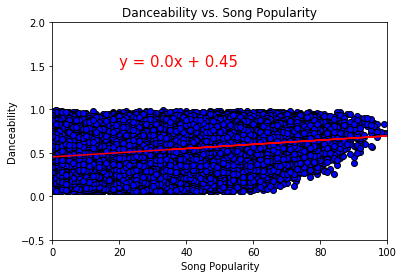

In [42]:
# Generate a scatter plot of popularity versus danceability
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter=clean_data1["danceability"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Danceability")
plt.title("Danceability vs. Song Popularity")
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between popularity and danceability is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot.png")

The correlation between popularity and tempo is 0.24


Text(20, 1.5, 'y = 0.0x + 0.42')

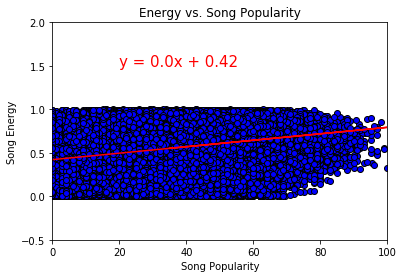

In [48]:
# Generate a scatter plot of popularity versus energy
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter1=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter1=clean_data1["energy"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Energy")
plt.title("Energy vs. Song Popularity")
plt.scatter(x_axis_scatter1, y_axis_scatter1, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter1,y_axis_scatter1)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter1, y_axis_scatter1)
regress_values = x_axis_scatter1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter1,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 1.png")

The correlation between popularity and tempo is 0.08


Text(20, 150, 'y = 0.15x + 111.79')

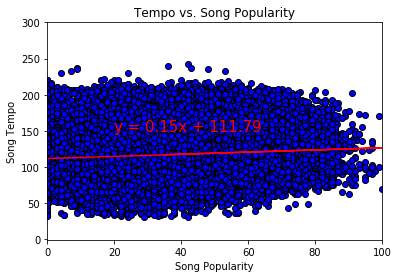

In [50]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter3=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter3=clean_data1["tempo"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,300)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Tempo")
plt.title("Tempo vs. Song Popularity")
plt.scatter(x_axis_scatter3, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter3,y_axis_scatter3)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter3,regress_values,"r-")
plt.annotate(line_eq,(20,150),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 3.png")